In [58]:
# Loading-in our data!
import torchvision


# downloading 50k image net samples.
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256,256]),
    torchvision.transforms.ToTensor()
])
data = torchvision.datasets.Imagenette(
    root = "imagenette_download",
    split = "train",
    download=False,
    transform=transform
)
data_raw=data

In [59]:
# using our extractor.
from dataloader import raw_images_convert
from dataloader import save_raw_labels

# saving all of our labels and images so
# they are acessible by model
raw_images_convert(data,'raw_images','jpeg') 
save_raw_labels(data,"label_folder","all")

# now, we can delete the real images, but keep for now.

Path exists, process skipped
labels.csv already created, skipping


'Yay!'

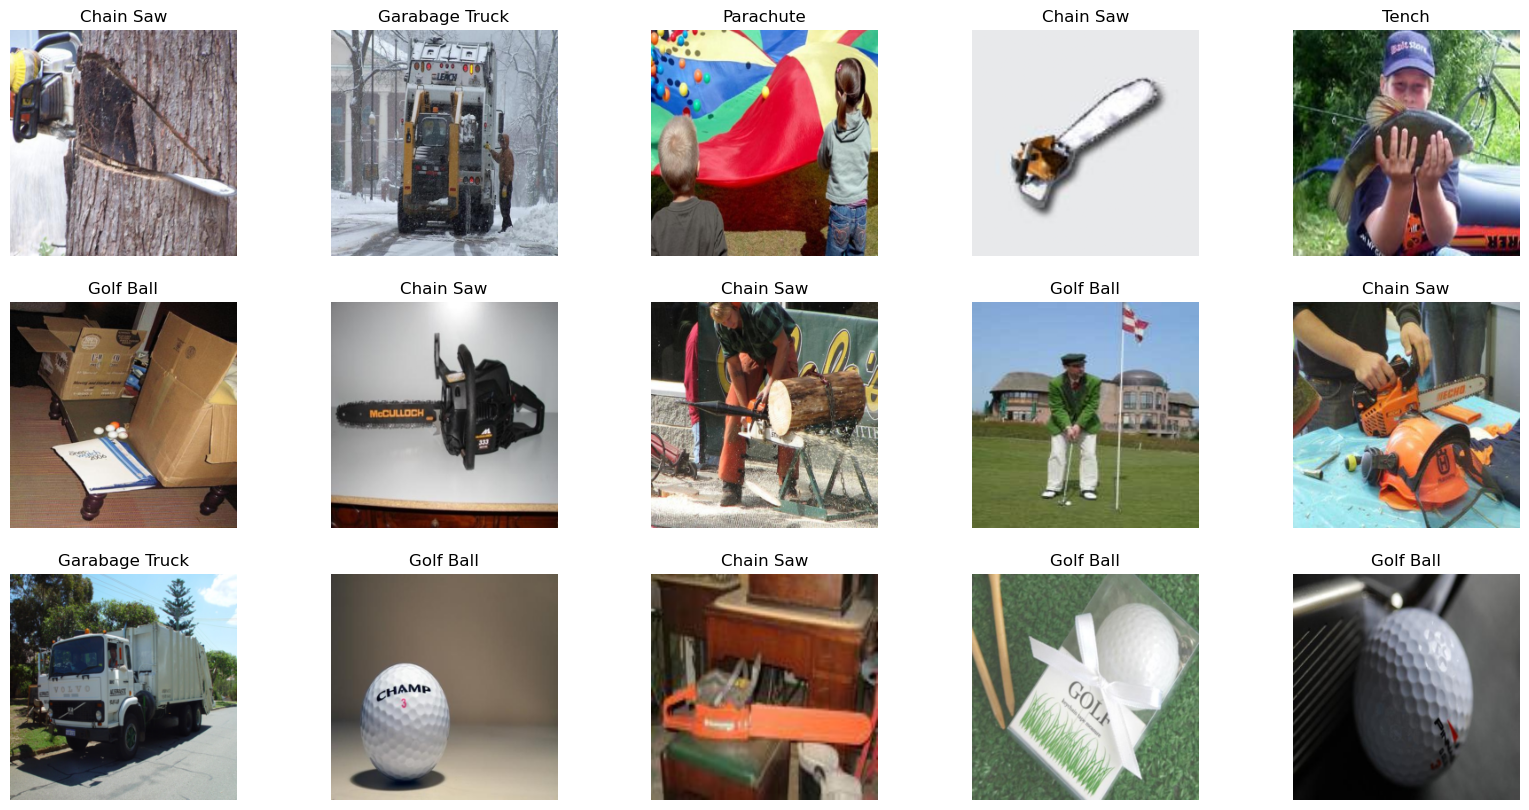

In [60]:
# making sure everything worked: saving into custom-dataset
from dataloader import ImageDataset
import matplotlib.pyplot as plt
import torch 
label_map = {
    0:"Tench",
    1:"English Springer",
    2: "Cassette Player",
    3:"Chain Saw",
    4:"Church",
    5:"French Horn",
    6:"Garabage Truck",
    7:"Gas Pump",
    8:"Golf Ball",
    9:"Parachute"
}

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256,256]),
    torchvision.transforms.ToTensor()
])
custom_data = ImageDataset(transform,'raw_images',"label_folder","jpeg",False,None)

fig, axes = plt.subplots(3,5)
fig.set_size_inches(20,10)
for i in range(15):
    ind = torch.randint(0,len(custom_data),size=(1,)).item()
    axes[i // 5][i%5].imshow(custom_data[ind][0].permute(1,2,0))
    axes[i // 5][i%5].set_title(label_map[custom_data[ind][1]])
    axes[i // 5][i%5].set_axis_off()


'Yay!'

## Using VAE to store latent representations

In [61]:
# creating paths
import os
import sys
sys.path.append(os.path.abspath('../VAE'))

In [62]:
import get_vae
from make_latents_sdxl import store_latents
vae,encoder = get_vae.get_vae()
vae.to('cuda'),encoder.to('cuda')
data = data_raw # imagenette
print(data[0][0].shape)
store_latents(data,'latent_folder_sdxl',encoder)

torch.Size([3, 256, 256])
Mapping already exists, skipping latent-storage


c:\Users\charl\OneDrive\Machine Learning\DiT Implementation\data\dataloader.py:131: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.images = torch.load(full_path,map_loca

Text(0.5, 0.98, 'Latent images')

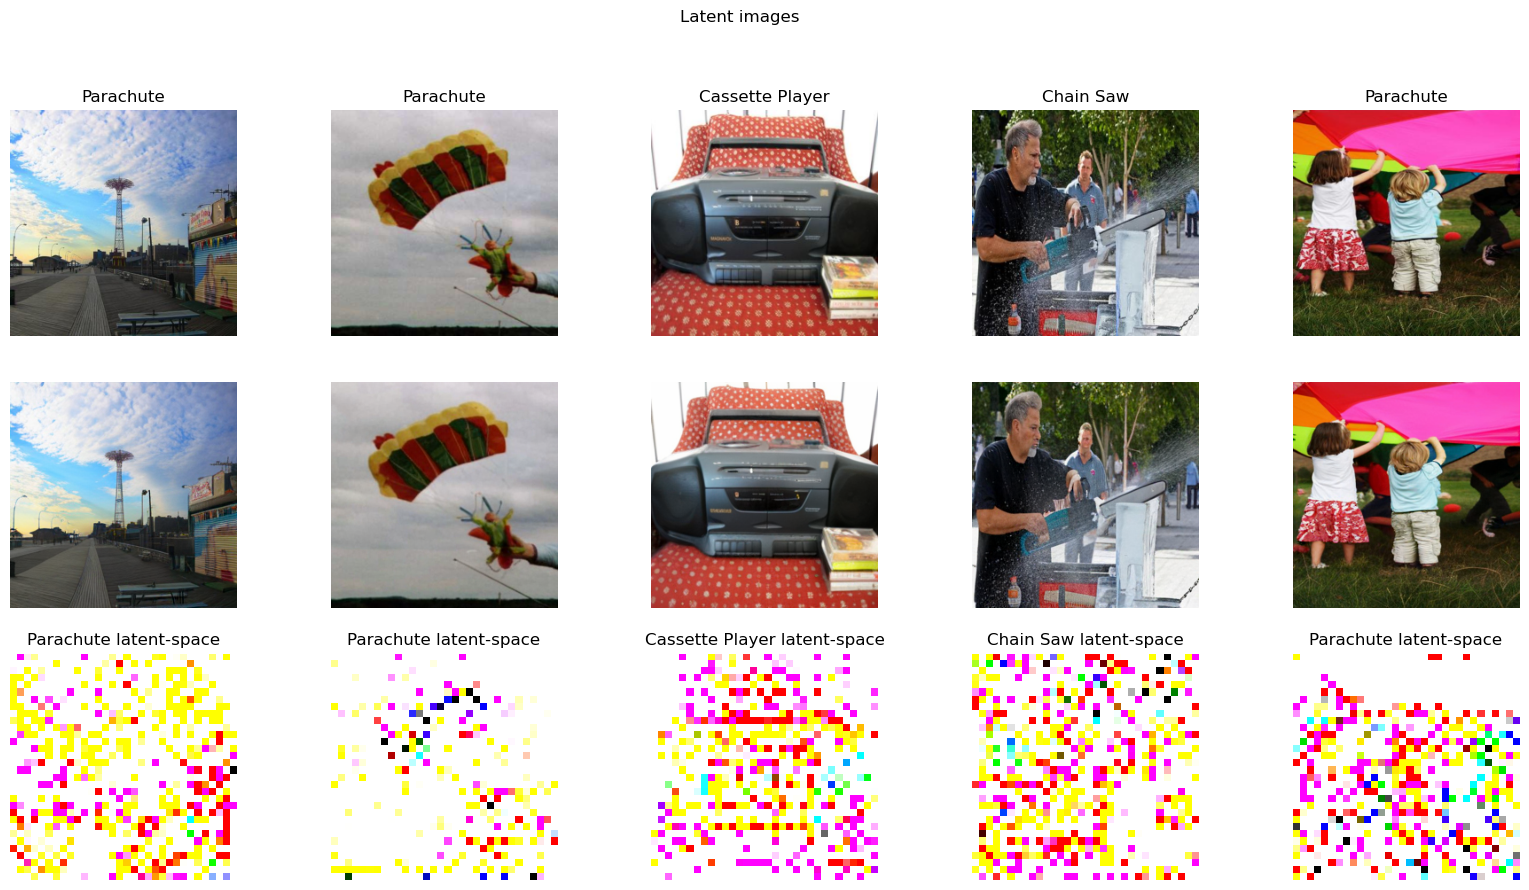

In [64]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize([256,256]),torchvision.transforms.ToTensor()])
custom_data = ImageDataset(transform=None,im_path='raw_images',label_folder='label_folder',im_extension='jpeg',use_latents=True,latent_folder='latent_folder_sdxl')
custom_data2 = ImageDataset(transform=transform,im_path='raw_images',label_folder='label_folder',im_extension='jpeg')

label_map = {
    0:"Tench",
    1:"English Springer",
    2: "Cassette Player",
    3:"Chain Saw",
    4:"Church",
    5:"French Horn",
    6:"Garabage Truck",
    7:"Gas Pump",
    8:"Golf Ball",
    9:"Parachute"
}

fig, axes = plt.subplots(3,5)
fig.set_size_inches(20,10)

for i in range(5):
    ind = torch.randint(0,len(custom_data),size=(1,)).item()
    label = label_map[custom_data[ind][1]]
    

    axes[0][i%5].imshow(custom_data2[ind][0].squeeze().permute(1,2,0))
    axes[0][i%5].set_title(label)
    
    # load our latents
    # and make sure we 
    # can decode them!
    model_out = vae.decode(custom_data[ind][0].to('cuda'))[0].squeeze()
    model_out = model_out.detach().to('cpu')
    axes[1][i%5].imshow(model_out.permute(1,2,0))
    
    model_latent = custom_data[ind][0].squeeze()
    axes[2][i%5].imshow(model_latent.permute(1,2,0))
    
    axes[0][i%5].axis('off')
    axes[1][i%5].axis('off')
    axes[2][i%5].axis('off')
    
    axes[2][i%5].set_title(f'{label} latent-space')
    
fig.suptitle("Latent images")
        